In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

Design_space shape: (125000, 3)
moment_capacity shape: (125000,)
Epoch 1/50

6250/6250 [==============================] - 10s 1ms/step - loss: 13213.9785 - val_loss: 7099.7588
Epoch 2/50
6250/6250 [==============================] - 9s 1ms/step - loss: 6970.1426 - val_loss: 6957.0239
Epoch 3/50
6250/6250 [==============================] - 9s 1ms/step - loss: 6950.3423 - val_loss: 6941.2949
Epoch 4/50
6250/6250 [==============================] - 9s 1ms/step - loss: 6938.7910 - val_loss: 6943.2881
Epoch 5/50
6250/6250 [==============================] - 9s 1ms/step - loss: 6929.3848 - val_loss: 6954.6753
Epoch 6/50
6250/6250 [==============================] - 9s 1ms/step - loss: 6931.2563 - val_loss: 6948.6001
Epoch 7/50
6250/6250 [==============================] - 11s 2ms/step - loss: 6922.2451 - val_loss: 6935.0737
Epoch 8/50
6250/6250 [==============================] - 11s 2ms/step - loss: 6914.9736 - val_loss: 6961.0156
Epoch 9/50
6250/6250 [==============================] - 9s 1ms/ste

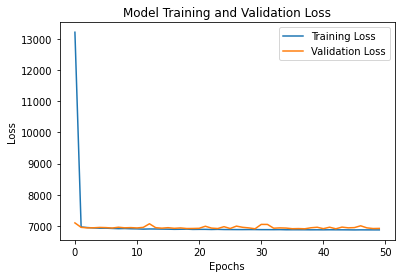

In [6]:
# Load data
Design_space = np.load('Design_space.npy')
moment_capacity = np.load('Mu.npy')

# Check shapes
print("Design_space shape:", Design_space.shape)
print("moment_capacity shape:", moment_capacity.shape)

# Reshape moment_capacity if necessary
if len(moment_capacity.shape) == 1:  # Assuming moment_capacity is 1D
    moment_capacity = moment_capacity.reshape(-1, 1)  # Reshape to a 2D array with one column

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(moment_capacity, Design_space, test_size=0.2, random_state=42)

# Define input and output dimensions
input_dim = X_train.shape[1]
output_dim = Design_space.shape[1]

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(output_dim)  # Output layer
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')  # Using mean squared error loss

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()